In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import json

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

get some basic info of data files

In [2]:
# ValueError: could not convert string to float: '8789-0'
def read_data_partial(given_fname, output_fname, lim=20000):
    content = []
    count = 1

    with open(given_fname, 'r') as fr:
        for line in fr:
            if count <= lim:
                #print(type(line), line)
                content.append(line)
                count += 1
    with open(output_fname, 'w') as fw:
        for line in content:
            # print(type(line), line)
            fw.write(line)
    
    data = pd.read_csv(output_fname, index_col=False)

    return data

In [3]:
qso_train_partial = read_data_partial('quasar_train_catalog.csv', 'qso_train_partial.csv')
print('qso_train_catalog.csv partial data description: ')
qso_train_partial.describe()

qso_train_catalog.csv partial data description: 


,ra_d,dec_d,z,u_LSST_mag,u_LSST_magerr,g_LSST_mag,g_LSST_magerr,r_LSST_mag,r_LSST_magerr,i_LSST_mag,...,y_LSST_mag,y_LSST_magerr,Y_WFI_mag,Y_WFI_magerr,J_WFI_mag,J_WFI_magerr,H_WFI_mag,H_WFI_magerr,F_WFI_mag,F_WFI_magerr
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,23.623792,-22.262561,7.999811,99.164311,0.091043,98.638451,0.205693,83.708411,0.652219,56.014640,...,38.686915,3.220267,22.667320,0.422618,18.249912,0.010070,17.991365,0.010060,17.924648,0.010103
std,13.673958,13.470843,1.154848,7.623070,3.252917,9.636021,9.258799,30.350312,27.306826,36.410617,...,31.606316,187.985892,10.687478,10.845862,0.144553,0.000095,0.344047,0.000094,0.354783,0.000099
min,0.001002,-47.495711,6.000196,26.765039,0.000000,27.911082,0.000000,22.470212,0.000000,20.720397,...,17.907592,0.000000,17.958488,0.000000,17.975591,0.009674,16.702080,0.009707,16.475177,0.009701
25%,11.645229,-33.527219,6.999971,99.990000,0.000000,99.990000,0.000000,99.990000,0.000000,25.028411,...,18.943982,0.010414,18.566404,0.010093,18.124439,0.010005,17.823141,0.009996,17.735487,0.010036
50%,23.594917,-21.578934,7.999920,99.990000,0.000000,99.990000,0.000000,99.990000,0.000000,29.389093,...,25.259249,0.011343,19.349044,0.010231,18.251091,0.010069,18.066165,0.010060,17.993070,0.010102
75%,35.422686,-10.572103,8.999614,99.990000,0.000000,99.990000,0.000000,99.990000,0.000000,99.990000,...,28.266166,0.560991,24.374057,0.018531,18.374454,0.010133,18.243405,0.010124,18.180132,0.010169
max,47.497256,-0.000376,9.999744,99.990000,285.052158,99.990000,878.110221,99.990000,2836.799364,99.990000,...,99.990000,26004.534629,99.990000,1291.885585,18.525293,0.010423,18.651787,0.010430,18.738388,0.010521


In [4]:
# brown dwarf contaminants
mlt_train_partial = read_data_partial('mlt_train_catalog.csv', 'mlt_train_partial.csv')
print('mlt_train_catalog.csv partial data description: ')
mlt_train_partial.describe()

mlt_train_catalog.csv partial data description: 


,ra_d,dec_d,spt,u_LSST_mag,u_LSST_magerr,g_LSST_mag,g_LSST_magerr,r_LSST_mag,r_LSST_magerr,i_LSST_mag,...,y_LSST_mag,y_LSST_magerr,Y_WFI_mag,Y_WFI_magerr,J_WFI_mag,J_WFI_magerr,H_WFI_mag,H_WFI_magerr,F_WFI_mag,F_WFI_magerr
count,19999.000000,19999.000000,19999.000000,1.999900e+04,19999.0,1.999900e+04,19999.0,19999.000000,19999.000000,19999.000000,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,23.604072,-22.261228,4.936797,9.999000e+01,0.0,9.999000e+01,0.0,24.416302,0.020199,19.872187,...,18.550723,0.010603,18.398234,0.010083,18.146058,0.010062,18.037319,0.010061,18.142713,0.010119
std,13.705803,13.505142,0.251022,8.540937e-12,0.0,8.540937e-12,0.0,0.182280,0.001938,0.142525,...,0.140613,0.000146,0.141465,0.000094,0.143001,0.000094,0.144039,0.000095,0.141402,0.000096
min,0.001930,-47.499684,3.000000,9.999000e+01,0.0,9.999000e+01,0.0,23.472924,0.013136,19.108723,...,18.098625,0.010041,17.893173,0.009737,17.674221,0.009702,17.560797,0.009668,17.670703,0.009760
25%,11.705409,-33.465227,5.000000,9.999000e+01,0.0,9.999000e+01,0.0,24.334772,0.018985,19.777932,...,18.454311,0.010503,18.301993,0.010020,18.049020,0.009998,17.939912,0.009996,18.046667,0.010054
50%,23.631542,-21.691304,5.000000,9.999000e+01,0.0,9.999000e+01,0.0,24.433813,0.020168,19.871827,...,18.547176,0.010598,18.393954,0.010082,18.140592,0.010061,18.031482,0.010060,18.136810,0.010118
75%,35.444491,-10.547422,5.000000,9.999000e+01,0.0,9.999000e+01,0.0,24.530030,0.021422,19.966675,...,18.643236,0.010697,18.487967,0.010146,18.235301,0.010125,18.127651,0.010124,18.234207,0.010184
max,47.487130,-0.000214,5.000000,9.999000e+01,0.0,9.999000e+01,0.0,25.108104,0.028811,20.899200,...,19.597340,0.011930,19.603275,0.010474,19.237794,0.010491,19.127854,0.010468,19.231066,0.010537


In [5]:
galaxies_patch8789_partial = read_data_partial('galaxies_train_catalog_patch8789.csv', 'galaxies_patch8789_partial.csv')
print('galaxies_train_catalog_patch8789.csv partial data description: ')
galaxies_patch8789_partial.describe()

galaxies_train_catalog_patch8789.csv partial data description: 


,ra_d,dec_d,z,redsq_flag,u_LSST_mag,u_LSST_magerr,g_LSST_mag,g_LSST_magerr,r_LSST_mag,r_LSST_magerr,...,z_LSST_mag,z_LSST_magerr,Y_WFI_mag,Y_WFI_magerr,J_WFI_mag,J_WFI_magerr,H_WFI_mag,H_WFI_magerr,F_WFI_mag,F_WFI_magerr
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,23.878705,-22.182163,1.029736,0.206060,32.096210,0.841619,27.163475,0.365798,25.867251,0.086984,...,24.665585,0.103122,24.393170,0.047201,24.257111,0.041552,24.143105,0.041009,24.097952,0.068160
std,13.681795,13.538485,0.013707,0.404484,19.985380,8.052372,7.995741,11.988124,2.446110,0.273719,...,2.360016,0.326791,1.390669,0.077989,1.525714,0.041961,1.372470,0.040619,1.855994,0.311219
min,0.000400,-47.490719,1.005989,0.000000,20.885667,0.000000,21.017643,0.000000,21.061000,0.000000,...,20.251427,0.000000,19.714550,0.000000,19.313884,0.000000,18.971237,0.010012,18.749711,0.000000
25%,12.078150,-33.422642,1.018022,0.000000,25.268505,0.060758,25.333199,0.036689,24.983450,0.026726,...,23.871939,0.034156,23.650510,0.020292,23.493042,0.018506,23.372548,0.017841,23.296980,0.023390
50%,23.957857,-21.268991,1.030270,0.000000,26.503441,0.193694,26.418137,0.082988,25.941315,0.050624,...,24.740292,0.063615,24.545892,0.033595,24.424274,0.030043,24.329182,0.029424,24.277466,0.043752
75%,35.765324,-10.507017,1.040617,0.000000,27.615922,0.475728,27.355587,0.181539,26.707190,0.092916,...,25.467804,0.115342,25.283910,0.056736,25.188414,0.050689,25.119557,0.050084,25.074150,0.080108
max,47.499362,-0.001712,1.055213,1.000000,99.990000,610.729321,99.990000,1616.793763,99.990000,27.122388,...,99.990000,24.843754,99.990000,8.171002,99.990000,1.879305,28.627669,1.148440,99.990000,40.846061


In [6]:
galaxies_patch8786_partial = read_data_partial('galaxies_train_catalog_patch8786.csv', 'galaxies_patch8786_partial.csv')
print('galaxies_train_catalog_patch8786.csv partial data description: ')
galaxies_patch8786_partial.describe()

galaxies_train_catalog_patch8786.csv partial data description: 


,ra_d,dec_d,z,redsq_flag,u_LSST_mag,u_LSST_magerr,g_LSST_mag,g_LSST_magerr,r_LSST_mag,r_LSST_magerr,...,y_LSST_mag,y_LSST_magerr,Y_WFI_mag,Y_WFI_magerr,J_WFI_mag,J_WFI_magerr,H_WFI_mag,H_WFI_magerr,F_WFI_mag,F_WFI_magerr
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,23.861391,-22.220777,1.033303,0.207710,32.076440,0.902327,27.211979,0.380718,25.851356,0.088822,...,25.221141,0.399308,24.361144,0.046372,24.219740,0.041185,24.111885,0.040571,24.051143,0.065607
std,13.730388,13.446906,0.013441,0.405678,19.986324,8.611686,8.326998,11.659733,2.517689,0.307329,...,7.801614,7.439558,1.312732,0.045483,1.353944,0.037782,1.402496,0.038762,1.544440,0.090881
min,0.000071,-47.499394,1.005990,0.000000,20.511595,0.000000,20.689145,0.000000,20.749999,0.000000,...,19.776906,0.000000,19.571055,0.010152,19.165246,0.010151,18.841577,0.010053,18.619593,0.000000
25%,11.862930,-33.452881,1.023309,0.000000,25.265173,0.057836,25.334869,0.036408,24.961529,0.026510,...,23.664300,0.072782,23.602897,0.019855,23.443356,0.018111,23.313647,0.017441,23.232343,0.022583
50%,23.977822,-21.484245,1.033333,0.000000,26.509003,0.197169,26.402710,0.082021,25.929260,0.050329,...,24.574696,0.157360,24.531609,0.033312,24.416682,0.029878,24.321447,0.029093,24.272070,0.043334
75%,35.794271,-10.561793,1.045235,0.000000,27.604059,0.477124,27.339770,0.178356,26.703131,0.092701,...,25.323580,0.305534,25.281628,0.056255,25.179444,0.050102,25.107016,0.049410,25.066376,0.079415
max,47.496472,-0.001413,1.055212,1.000000,99.990000,605.642904,99.990000,1492.010952,99.990000,30.285473,...,99.990000,979.763106,29.062647,1.628481,28.248498,0.767126,28.574002,1.177792,99.990000,5.245063


## drop u and g bands

In [7]:
qso_train_drop = qso_train_partial.copy(deep=True)
mlt_train_drop = mlt_train_partial.copy(deep=True)
galaxies_patch8789_drop = galaxies_patch8789_partial.copy(deep=True)
galaxies_patch8786_drop = galaxies_patch8786_partial.copy(deep=True)

# drop y bands due to varying band depth
qso_train_drop = qso_train_drop[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_train_drop = mlt_train_drop[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8789_drop = galaxies_patch8789_drop[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
galaxies_patch8786_drop = galaxies_patch8786_drop[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]

In [8]:
print(mlt_train_drop.head())

   r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
0   23.771728   19.188742   18.619318  18.234199  18.173076  18.075345   
1   24.057291   19.349954   18.518527  18.288840  18.190218  17.931068   
2   23.800163   19.231461   18.658050  18.124577  18.069681  18.094448   
3   23.875277   19.292420   18.613907  18.302484  18.055089  17.946084   
4   23.916246   19.295319   18.665239  18.207935  18.128765  18.094981   

   F_WFI_mag  
0  18.112094  
1  18.153265  
2  17.930868  
3  17.947154  
4  18.246019  


### drop missing values

In [9]:
qso_train_drop = qso_train_drop.replace(99.99, np.nan).dropna()
mlt_train_drop = mlt_train_drop.replace(99.99, np.nan).dropna()
galaxies_patch8789_drop = galaxies_patch8789_drop.replace(99.99, np.nan).dropna()
galaxies_patch8786_drop = galaxies_patch8786_drop.replace(99.99, np.nan).dropna()

print(qso_train_drop.head(), len(qso_train_drop))
print(np.where(np.isnan(qso_train_drop)))
print(len(mlt_train_drop))
print(np.where(np.isnan(mlt_train_drop)))
print(len(galaxies_patch8789_drop))
print(np.where(np.isnan(galaxies_patch8789_drop)))
print(len(galaxies_patch8786_drop))
print(np.where(np.isnan(galaxies_patch8786_drop)))

   r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
0   23.264536   21.124055   18.554360  18.128561  18.023118  17.887595   
1   22.749456   20.809598   18.341480  18.051626  18.089177  18.128696   
2   23.423308   21.433489   18.603074  18.187806  18.020838  17.793332   
3   23.340448   21.204065   18.452523  18.136504  18.066659  17.968268   
4   23.158449   20.894110   18.271392  18.043841  18.061578  18.047223   

   F_WFI_mag  
0  17.631285  
1  18.004063  
2  17.472947  
3  17.731981  
4  17.902222   4402
(array([], dtype=int64), array([], dtype=int64))
19999
(array([], dtype=int64), array([], dtype=int64))
19958
(array([], dtype=int64), array([], dtype=int64))
19961
(array([], dtype=int64), array([], dtype=int64))


In [10]:
qso_train_drop['label'] = np.ones(len(qso_train_drop))
mlt_train_drop['label'] = np.zeros(len(mlt_train_drop))
galaxies_patch8789_drop['label'] = np.zeros(len(galaxies_patch8789_drop))
galaxies_patch8786_drop['label'] = np.zeros(len(galaxies_patch8786_drop))

### check the cleaned datasets and concatenate into new ones

In [11]:
print('qso:\n', qso_train_drop.head())
print('bd:\n', mlt_train_drop.head())
print('galaxies patch8789:\n', galaxies_patch8789_drop.head())
print('galaxies path8786:\n', galaxies_patch8786_drop.head())

qso:
    r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
0   23.264536   21.124055   18.554360  18.128561  18.023118  17.887595   
1   22.749456   20.809598   18.341480  18.051626  18.089177  18.128696   
2   23.423308   21.433489   18.603074  18.187806  18.020838  17.793332   
3   23.340448   21.204065   18.452523  18.136504  18.066659  17.968268   
4   23.158449   20.894110   18.271392  18.043841  18.061578  18.047223   

   F_WFI_mag  label  
0  17.631285    1.0  
1  18.004063    1.0  
2  17.472947    1.0  
3  17.731981    1.0  
4  17.902222    1.0  
bd:
    r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
0   23.771728   19.188742   18.619318  18.234199  18.173076  18.075345   
1   24.057291   19.349954   18.518527  18.288840  18.190218  17.931068   
2   23.800163   19.231461   18.658050  18.124577  18.069681  18.094448   
3   23.875277   19.292420   18.613907  18.302484  18.055089  17.946084   
4   23.916246   19.295319   18.665239  18.

In [12]:
# data concatenation to get training data
contaminants_drop = pd.concat([mlt_train_drop, galaxies_patch8789_drop, galaxies_patch8786_drop], ignore_index=True)
data_train_drop = pd.concat([qso_train_drop, contaminants_drop], ignore_index=True) # make sure that the data line up
X_drop = data_train_drop[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag','Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
Y_drop = data_train_drop['label']

In [13]:
print(len(X_drop))

64320


In [14]:
X_drop.describe()

,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,64320.000000,64320.000000,64320.000000,64320.000000,64320.000000,64320.000000,64320.000000
mean,25.462827,23.381745,22.597101,22.104863,21.928436,21.825399,21.808399
std,1.498309,2.674592,2.824561,3.073334,3.126510,3.134697,3.091399
min,20.749999,19.108723,18.073481,17.893173,17.674221,17.184999,17.143052
25%,24.412208,19.991989,19.107842,18.454022,18.217114,18.119852,18.188870
50%,25.076985,24.256197,23.606381,23.312729,23.127850,22.983096,22.891462
75%,26.409053,25.640148,25.004998,24.817890,24.706659,24.626714,24.577408
max,37.997592,33.782180,32.209823,29.263699,29.527499,28.627669,31.803707


### check some influential combinations of color indices - linear svc

22 < i < 25.0

In [15]:
X_drop_25 = X_drop[X_drop['i_LSST_mag'] < 25.0]
X_drop_25 = X_drop_25[X_drop_25['i_LSST_mag'] > 22.0]
Y_drop_25 = data_train_drop[data_train_drop['i_LSST_mag'] < 25.0]
Y_drop_25 = Y_drop_25[Y_drop_25['i_LSST_mag'] > 22.0]['label']
col_names = ['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']
for i in range(len(col_names)):
    for j in range(len(col_names)):
        if i < j:
            col = col_names[i] + '-' + col_names[j]
            X_drop_25[col] = X_drop_25[col_names[i]] - X_drop_25[col_names[j]]

X_drop_25_copy = X_drop_25.drop(columns=['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'])

/data0/sw/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


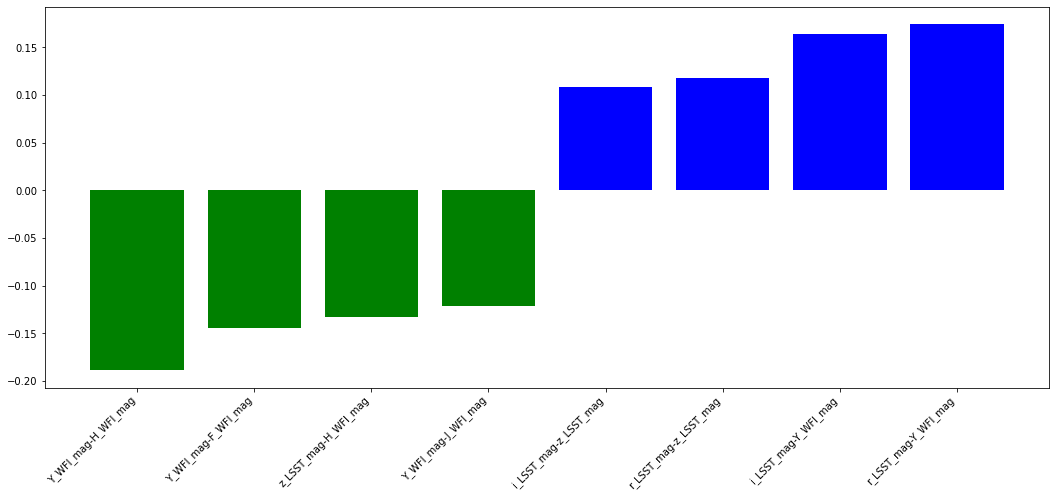

In [20]:
trainedsvm = svm.LinearSVC(max_iter = 2000).fit(X_drop_25_copy, Y_drop_25)
coef = trainedsvm.coef_.ravel()

top_positive_coefficients = np.argsort(coef)[-4:]
top_negative_coefficients = np.argsort(coef)[:4]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
plt.figure(figsize=(18, 7))
colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * 4), coef[top_coefficients], color=colors)
feature_names = np.array(X_drop_25_copy.columns)
plt.xticks(np.arange(2 * 4), feature_names[top_coefficients], rotation=45, ha='right')
plt.show()

In [16]:
# keep the columns with the highest influences & check if the dataframes look reasonable
# with i-band limits
X_drop_25 = X_drop_25[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'Y_WFI_mag-H_WFI_mag', 'Y_WFI_mag-F_WFI_mag','z_LSST_mag-H_WFI_mag', 'Y_WFI_mag-J_WFI_mag', 'i_LSST_mag-z_LSST_mag', 'r_LSST_mag-z_LSST_mag', 'i_LSST_mag-Y_WFI_mag', 'r_LSST_mag-Y_WFI_mag']]

print(type(X_drop_25))
print('X with 22.0 < i < 25.0: \n', X_drop_25.head())

<class 'pandas.core.frame.DataFrame'>
X with 22.0 < i < 25.0: 
      r_LSST_mag  i_LSST_mag  z_LSST_mag  Y_WFI_mag  J_WFI_mag  H_WFI_mag  \
250   24.742821   22.094462   18.874546  18.141918  18.092987  18.074826   
304   25.848806   22.030592   19.422444  18.264333  18.076935  17.984105   
306   25.643431   22.038840   19.404501  18.273683  18.043071  17.844302   
310   25.614387   22.020449   19.134073  18.132919  17.997342  17.920215   
313   25.498590   22.068718   19.220210  18.246276  18.091573  17.966831   

     F_WFI_mag  Y_WFI_mag-H_WFI_mag  Y_WFI_mag-F_WFI_mag  \
250  17.924192             0.067092             0.217726   
304  17.798655             0.280228             0.465679   
306  17.566675             0.429381             0.707008   
310  17.727046             0.212703             0.405873   
313  17.738691             0.279445             0.507585   

     z_LSST_mag-H_WFI_mag  Y_WFI_mag-J_WFI_mag  i_LSST_mag-z_LSST_mag  \
250              0.799720             0.04893

In [17]:
X_drop_25_copy = X_drop_25.copy()

### color-color plots to decide which combinations should be used for decision boundaries 

check which ones are the most "separable"

In [27]:
import seaborn as sns

In [28]:
def color_plot(X, x_lab, y_lab):
    q = sns.jointplot(data=X, x=x_lab, y=y_lab, hue='label', kind='scatter', joint_kws={"alpha": 0.3})

### with missing values dropped

22.0 < i < 25.0

16


/data0/sw/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


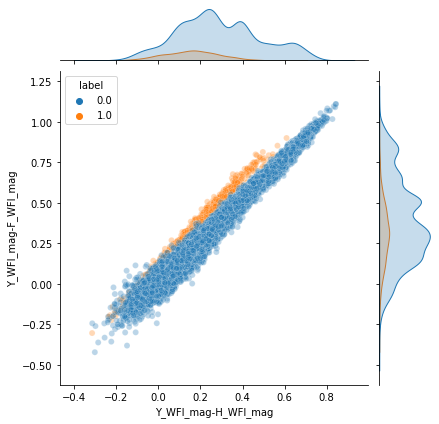

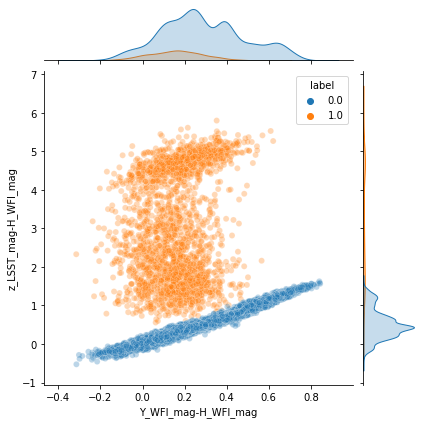

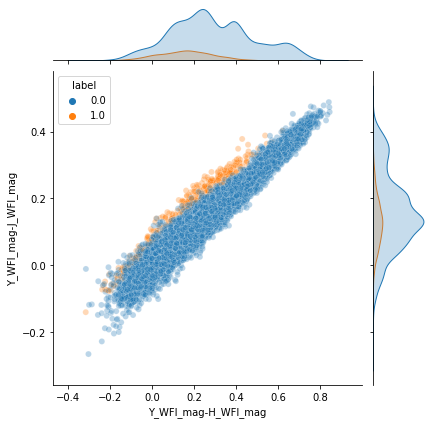

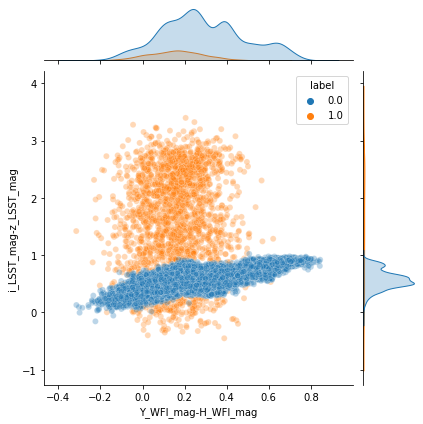

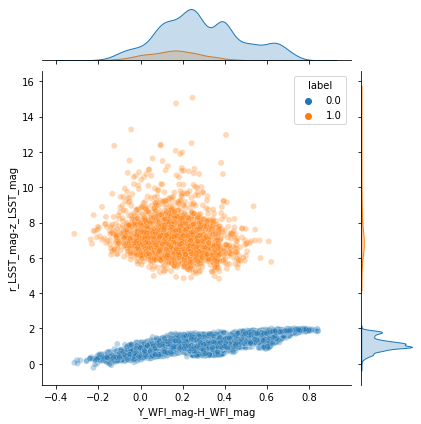

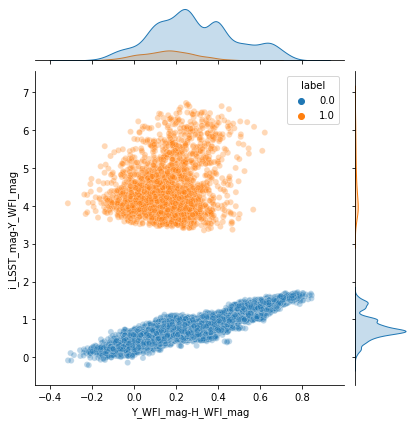

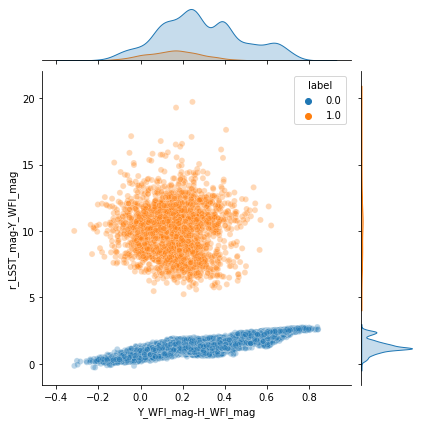

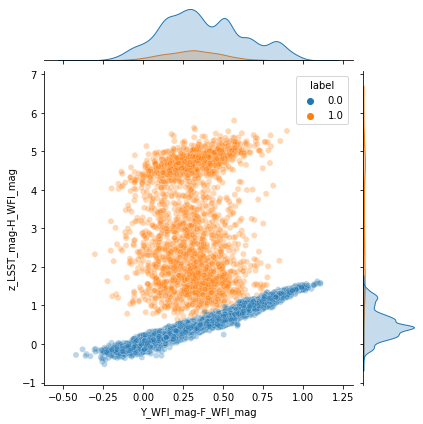

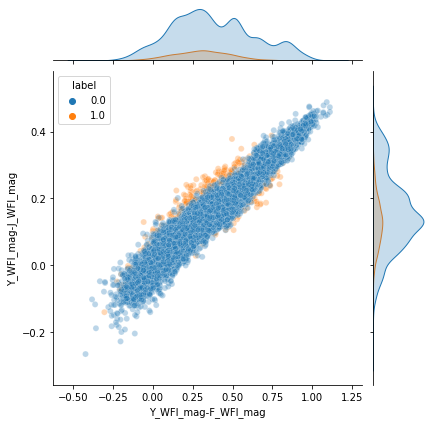

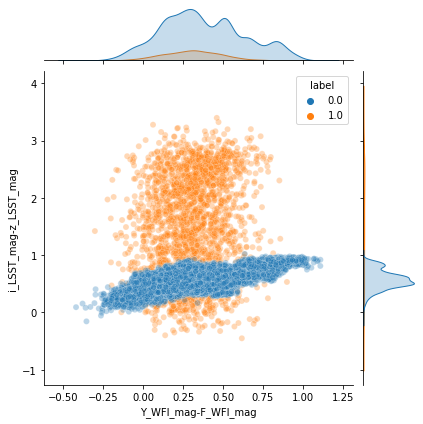

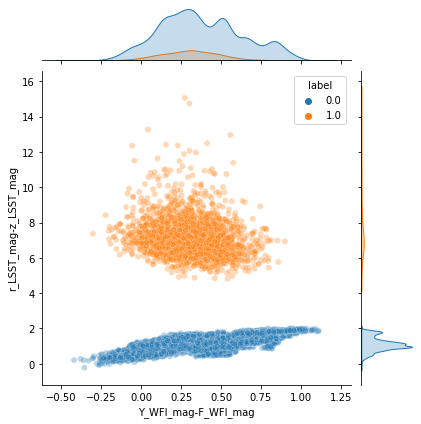

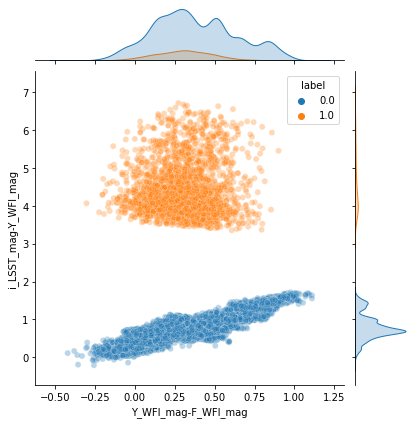

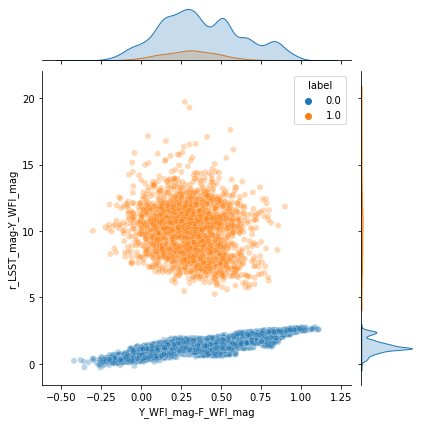

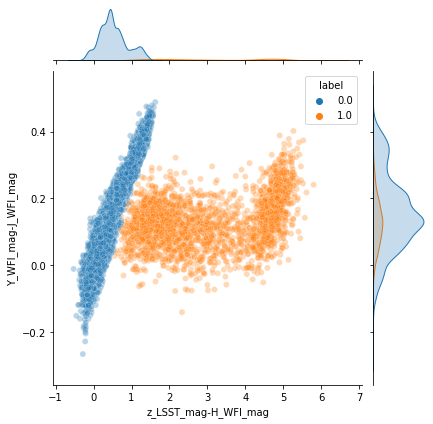

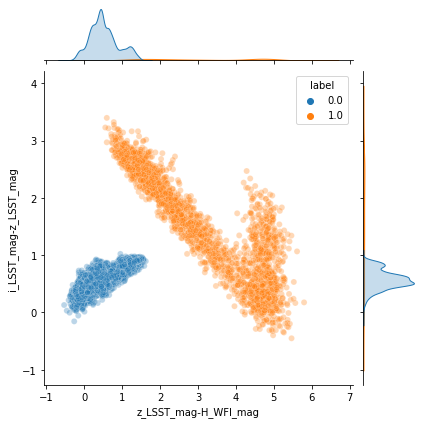

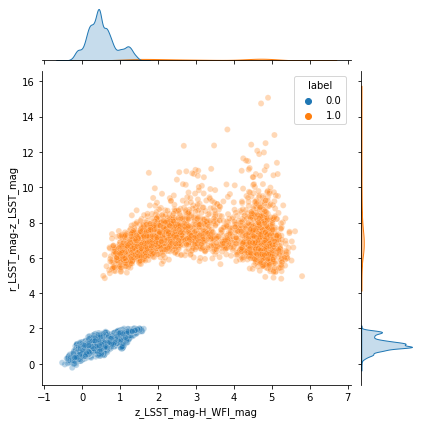

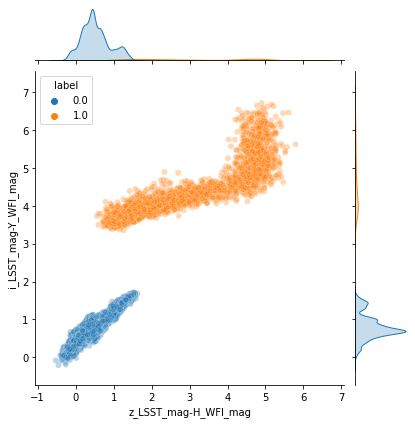

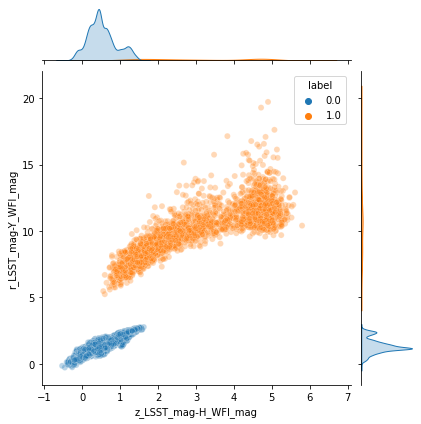

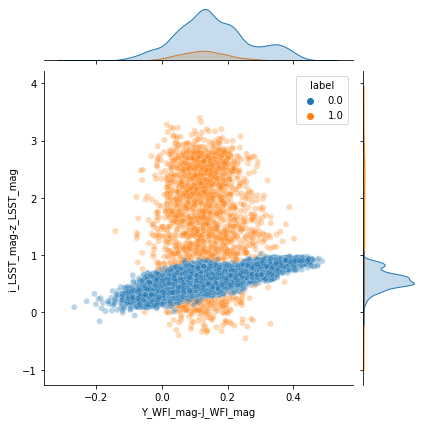

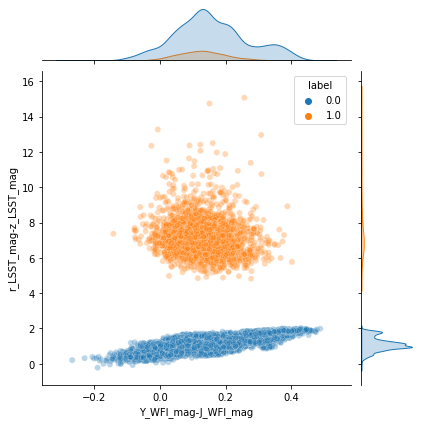

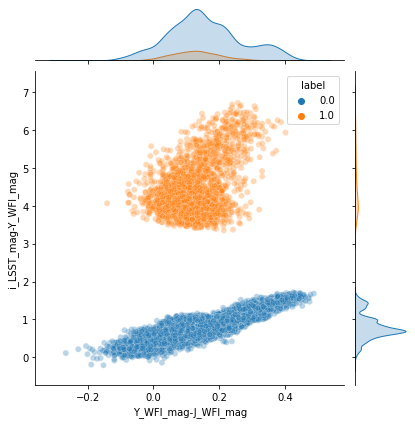

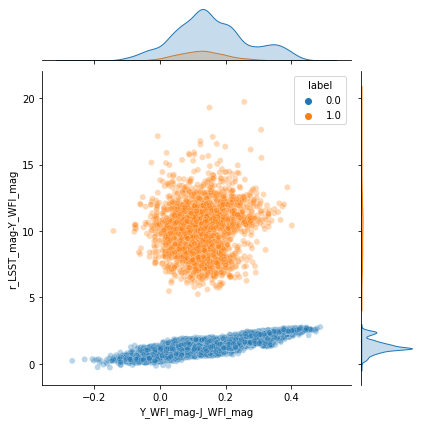

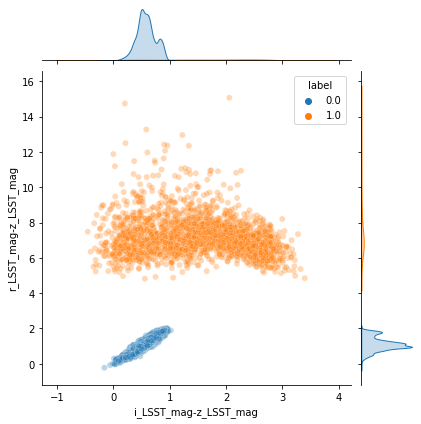

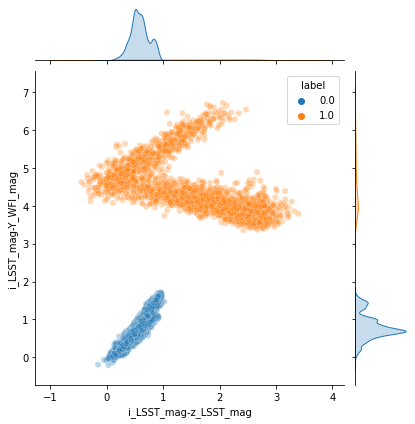

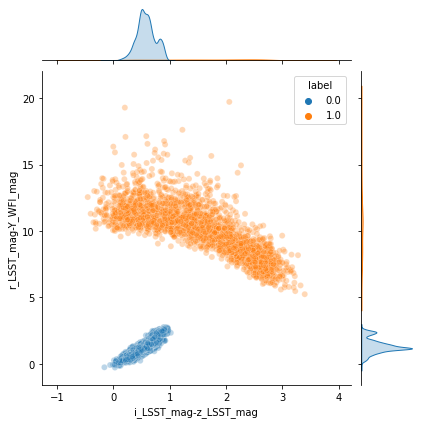

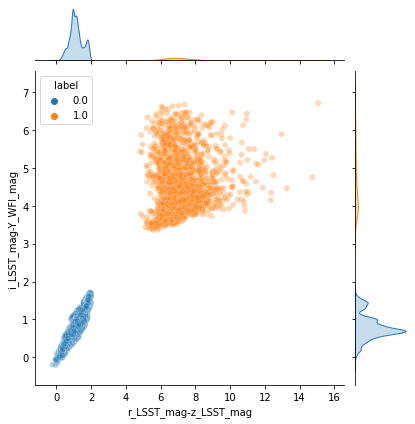

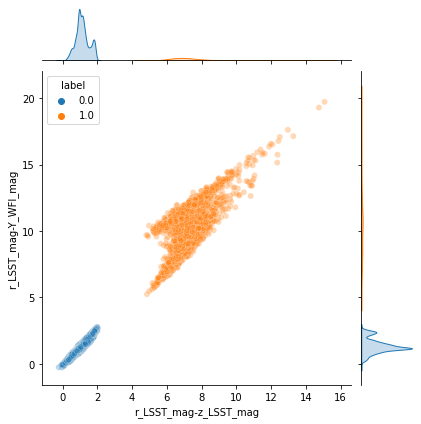

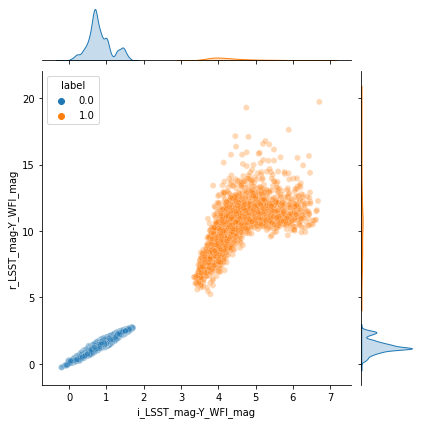

In [33]:
cols = X_drop_25_copy.columns
print(len(cols))

for i in range(7, 15):
    x_lab = cols[i]
    # range may change later 
    for j in range(i+1, 15):
        y_lab = cols[j]
        color_plot(X_drop_25_copy, x_lab, y_lab)

### KNN decision boundaries

k-fold to get some parameter estimations?

In [27]:
from numba import jit, cuda

In [28]:
@jit(forceobj=True, parallel=True) 
def knn_training(x1, x2, y1, y2, y, n, leaves):
    # format x1: X['r']
    # type: n -> list of integers
    features = [x1-x2, y1-y2]
    X = np.array(features).transpose()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    grid_params = { 'n_neighbors' : n,
                   'leaf_size': leaves,
                   'weights' :  ['uniform','distance'],
                   'p': [1, 2, 3, 4, 5, 6],
                   'metric' : ['minkowski','euclidean','manhattan']}

    gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
    g_res = gs.fit(X_train, y_train)

    print('best score: ', g_res.best_score_)
    print('best params: ', g_res.best_params_)

In [18]:
def get_color_filter(clf, n_neighbors, weights, x1, x2, y1, y2, y):
    # Create color maps
    cmap_light = ListedColormap(['#75aff9', '#f7a844']) # blue, orange
    cmap_bold = ListedColormap(['#8dbcf9', '#f5a844']) 
    
    features = [x1-x2, y1-y2]
    X = np.array(features).transpose()

    # we create an instance of Neighbours Classifier and fit the data.
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = min(x1 - x2) - 1, max(x1 - x2) + 1
    y_min, y_max = min(y1 - y2) - 1, max(y1 - y2) + 1
    h = (x_max-x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.15)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=0.2)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.title("k = %i, weights = '%s'"
              % (n_neighbors, weights))

In [30]:
X_drop_25_copy = X_drop_25_copy.drop(columns=['label'])

KeyError: "['label'] not found in axis"

## 22.0 < i < 25.0, label

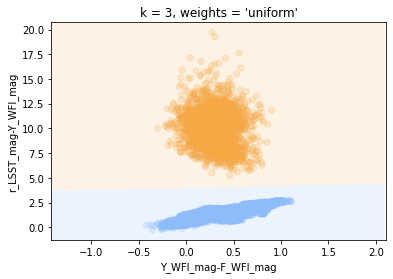

In [48]:
# x: Y - F
# y: r - Y
# knn_training(X_drop_25['Y_WFI_mag'], X_drop_25['F_WFI_mag'], X_drop_25['r_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25, [i for i in range(3, 26)], [5, 6, 7, 8, 9, 10, 12, 15, 20])

filter2a = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=5, weights='uniform')
get_color_filter(filter2a, 3, 'uniform', X_drop_25['Y_WFI_mag'], X_drop_25['F_WFI_mag'], X_drop_25['r_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25)
plt.xlabel('Y_WFI_mag-F_WFI_mag')
plt.ylabel('r_LSST_mag-Y_WFI_mag')
plt.show()

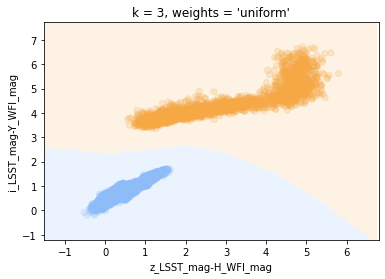

In [49]:
# x: z - H
# y: i - Y
# knn_training(X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25, [3, 4, 5, 7, 9, 13, 14, 15, 20], [3, 5, 6, 8])

filter2b = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=3, weights='uniform')
get_color_filter(filter2b, 3, 'uniform', X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

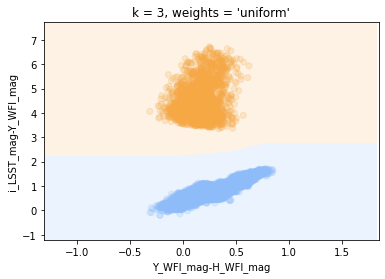

In [65]:
# x: Y - H
# y: i - Y
# knn_training(X_drop_25['Y_WFI_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25, [3, 5, 7, 9, 13, 15, 20], [3, 5, 6])
# best score:  0.9980201286646854
# best params:  {'leaf_size': 3, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 4, 'weights': 'uniform'}

filter2c = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=3, weights='uniform', p=1)
# filter2c = KNeighborsClassifier(metric='minkowski', n_neighbors=5, leaf_size=3, weights='uniform', p=4)
get_color_filter(filter2c, 3, 'uniform', X_drop_25['Y_WFI_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25)
plt.xlabel('Y_WFI_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

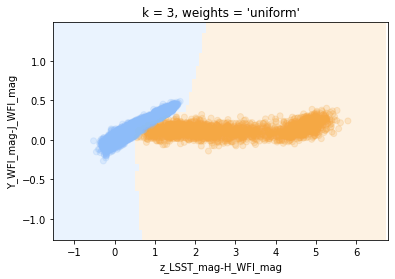

In [51]:
# x: z - H
# y: Y - J
# knn_training(X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['Y_WFI_mag'], X_drop_25['J_WFI_mag'], Y_drop_25, [3, 4, 5, 7, 9, 13, 14, 15, 20, 25], [3, 5, 6, 8])
# best score:  0.9995050730017322
# best params:  {'leaf_size': 3, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

filter2d = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=3, weights='uniform', p=2)
get_color_filter(filter2d, 3, 'uniform', X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['Y_WFI_mag'], X_drop_25['J_WFI_mag'], Y_drop_25)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('Y_WFI_mag-J_WFI_mag')
plt.show()

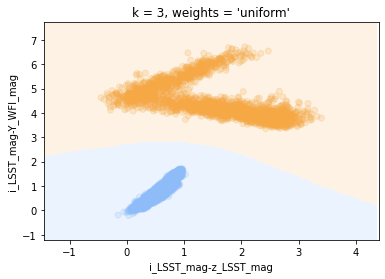

In [52]:
# x: i - z
# y: i - Y
# knn_training(X_drop_25['i_LSST_mag'], X_drop_25['z_LSST_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25, [3, 4, 5, 7, 9, 14], [3, 5, 8])

filter2e = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=3, weights='uniform')
get_color_filter(filter2e, 3, 'uniform', X_drop_25['i_LSST_mag'], X_drop_25['z_LSST_mag'], X_drop_25['i_LSST_mag'], X_drop_25['Y_WFI_mag'], Y_drop_25)
plt.xlabel('i_LSST_mag-z_LSST_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

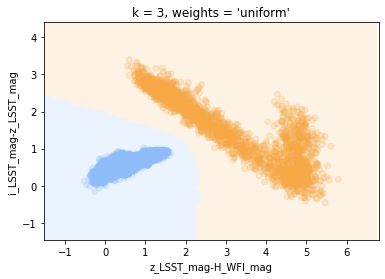

In [53]:
# x: z - H
# y: i - z
# knn_training(X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['z_LSST_mag'], Y_drop_25, [3, 4, 5, 7, 9], [3, 5, 8])

filter2f = KNeighborsClassifier(metric='minkowski', n_neighbors=3, leaf_size=3, weights='uniform')
get_color_filter(filter2f, 3, 'uniform', X_drop_25['z_LSST_mag'], X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag'], X_drop_25['z_LSST_mag'], Y_drop_25)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-z_LSST_mag')
plt.show()

### Test - 22 < i < 25.0

In [54]:
qso_test = pd.read_csv('quasar_test_catalog.csv', index_col=False)
qso_test = qso_test[['z','r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
qso_test = qso_test.replace(99.99, np.nan).dropna()
qso_test.describe()

,z,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000,5540.000000
mean,6.304751,29.788654,28.141333,25.946532,25.113679,25.090500,25.119312,24.908990
std,0.289486,1.325108,1.727730,2.203980,2.208496,2.224448,2.228957,2.202205
min,6.000077,23.737275,21.400500,18.803401,18.181244,18.048911,17.986569,17.740505
25%,6.094965,29.002694,27.055735,24.249919,23.451190,23.416544,23.445880,23.249794
50%,6.222428,29.640429,28.269932,26.080465,25.060542,25.026461,25.049666,24.870995
75%,6.422711,30.431686,29.143613,27.555345,26.788290,26.772365,26.798924,26.584627
max,8.482816,38.149953,35.495708,36.798806,35.672331,33.879891,34.514265,34.228085


In [55]:
galaxies_patch8788_partial = read_data_partial('galaxies_train_catalog_patch8788.csv', 'galaxies_patch8788_245.csv', 30000)
galaxies_patch8788_partial = galaxies_patch8788_partial.replace(99.99, np.nan).dropna()
galaxies_patch8788_partial = galaxies_patch8788_partial[['z', 'r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
print('galaxies_train_catalog_patch8788.csv partial data description: ')
galaxies_patch8788_partial.describe()

galaxies_train_catalog_patch8788.csv partial data description: 


,z,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag
count,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000,20750.000000
mean,1.032609,25.634571,25.064565,24.472561,24.263562,24.133942,24.032490,23.970953
std,0.014266,1.321680,1.258280,1.250795,1.294158,1.348217,1.403003,1.451221
min,1.005989,20.964661,20.738443,20.199310,19.730171,19.315425,18.971169,18.750817
25%,1.020363,24.856448,24.321473,23.749411,23.524088,23.357096,23.211484,23.120767
50%,1.033982,25.801020,25.208614,24.607205,24.439207,24.332423,24.249539,24.205313
75%,1.045150,26.523427,25.930392,25.342387,25.182842,25.094375,25.045359,25.005333
max,1.055212,33.438068,32.004925,31.083271,28.285061,28.161714,30.885336,32.729688


In [56]:
mlt_test = read_data_partial('mlt_test_catalog_max26.csv', 'mlt_test_catalog_255.csv', 100000)
mlt_test = mlt_test.sample(frac=0.4, replace=False, random_state=42)
mlt_test = mlt_test[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag']]
mlt_test = mlt_test.replace(99.99, np.nan).dropna()
mlt_test['z'] = np.zeros(mlt_test.shape[0])
print('mlt_test_catalog partial data description: ')
mlt_test.describe()

mlt_test_catalog partial data description: 


,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,z
count,39995.000000,39995.000000,39995.000000,39995.000000,39995.000000,39995.000000,39995.000000,39995.0
mean,26.997202,22.847905,21.668471,20.765261,20.444840,20.314135,20.314627,0.0
std,0.601555,0.590803,0.527936,0.510114,0.507987,0.508961,0.507175,0.0
min,25.271725,22.000020,20.269298,19.136802,18.942683,18.783449,18.733884,0.0
25%,26.666033,22.325603,21.242883,20.384266,20.076415,19.944635,19.970917,0.0
50%,27.026416,22.752097,21.613354,20.729046,20.414105,20.284399,20.298322,0.0
75%,27.367609,23.330051,22.078231,21.149319,20.825999,20.695270,20.687611,0.0
max,32.858471,24.518611,23.541767,22.762333,22.458010,22.288556,22.504555,0.0


In [57]:
qso_test_copy = qso_test.copy()
qso_test_copy['label'] = np.ones(len(qso_test_copy))
galaxies_patch8788_pcopy = galaxies_patch8788_partial.copy()
galaxies_patch8788_pcopy['label'] = np.zeros(len(galaxies_patch8788_pcopy))
test_wgal = pd.concat([qso_test_copy, galaxies_patch8788_pcopy], ignore_index=True)
test_wgal.describe()

,z,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label
count,26290.000000,26290.000000,26290.000000,26290.000000,26290.000000,26290.000000,26290.000000,26290.000000,26290.000000
mean,2.143589,26.509946,25.712921,24.783166,24.442704,24.335514,24.261512,24.168623,0.210727
std,2.154289,2.149161,1.858251,1.618524,1.571548,1.621540,1.672381,1.682379,0.407832
min,1.005989,20.964661,20.738443,18.803401,18.181244,18.048911,17.986569,17.740505,0.000000
25%,1.023576,25.139352,24.588200,23.813496,23.507708,23.364608,23.258437,23.148483,0.000000
50%,1.039947,26.182220,25.549185,24.752150,24.508003,24.406647,24.346107,24.283931,0.000000
75%,1.053059,27.463581,26.545962,25.634115,25.371764,25.295252,25.250710,25.206992,0.000000
max,8.482816,38.149953,35.495708,36.798806,35.672331,33.879891,34.514265,34.228085,1.000000


In [58]:
mlt_test_copy = mlt_test.copy()
mlt_test_copy['label'] = np.zeros(len(mlt_test_copy))
test0 = pd.concat([qso_test_copy, galaxies_patch8788_pcopy, mlt_test_copy], ignore_index=True)
test = test0[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'label']]
test.describe()

,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label
count,66285.000000,66285.000000,66285.000000,66285.000000,66285.000000,66285.000000,66285.000000,66285.000000
mean,26.803946,23.984230,22.903823,22.223811,21.987962,21.879746,21.843201,0.083578
std,1.451573,1.882692,1.878517,2.091162,2.195714,2.234847,2.198273,0.276757
min,20.964661,20.738443,18.803401,18.181244,18.048911,17.986569,17.740505,0.000000
25%,26.127461,22.553157,21.463744,20.599774,20.290025,20.160599,20.178190,0.000000
50%,26.886467,23.385994,22.173454,21.283549,20.958189,20.826658,20.802575,0.000000
75%,27.376274,25.074778,24.313794,24.039894,23.925974,23.837123,23.760279,0.000000
max,38.149953,35.495708,36.798806,35.672331,33.879891,34.514265,34.228085,1.000000


In [59]:
qso_test_25 = qso_test[qso_test['i_LSST_mag'] < 25.0]
qso_test_25 = qso_test_25[qso_test_25['i_LSST_mag'] > 22.0]
qso_test_25_copy = qso_test_25.copy()
print(len(qso_test_25))

224


In [71]:
test_copy = test.copy()
test_copy = test_copy[test_copy['i_LSST_mag'] > 22.0]
test_copy = test_copy[test_copy['i_LSST_mag'] < 25.0]
print(len(test_copy))
print(len(test_copy[test_copy['label'] == 1]))

48832
224


Need to fit the knn classifier again to "fix" its shape

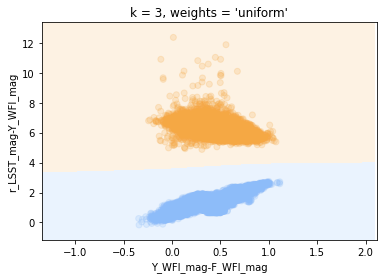

40219


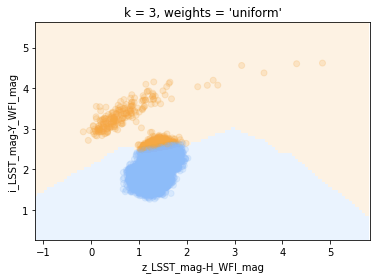

1411


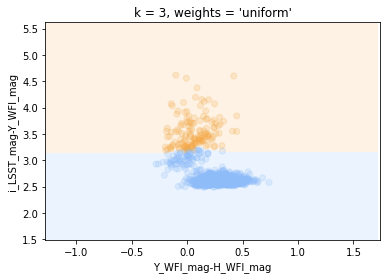

143


"\n# x: z - H\n# y: Y - J\nlabels = filter2d.predict(np.array([test_copy['z_LSST_mag']- test_copy['H_WFI_mag'], test_copy['Y_WFI_mag']- test_copy['J_WFI_mag']]).transpose())\n\nget_color_filter(filter2d, 3, 'uniform', test_copy['z_LSST_mag'], test_copy['H_WFI_mag'], test_copy['Y_WFI_mag'], test_copy['J_WFI_mag'], labels)\nplt.xlabel('z_LSST_mag-H_WFI_mag')\nplt.ylabel('Y_WFI_mag-J_WFI_mag')\nplt.show()\n\ntest_copy['label'] = labels\ntest_copy = test_copy[test_copy['label'] == 1]\nprint(len(test_copy))\n\n\n# x: i - z\n# y: i - Y\nlabels = filter2e.predict(np.array([test_copy['i_LSST_mag']-test_copy['z_LSST_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())\n\nget_color_filter(filter2e, 3, 'uniform', test_copy['i_LSST_mag'], test_copy['z_LSST_mag'], test_copy['i_LSST_mag'], test_copy['Y_WFI_mag'], labels)\nplt.xlabel('i_LSST_mag-z_LSST_mag')\nplt.ylabel('i_LSST_mag-Y_WFI_mag')\nplt.show()\n\ntest_copy['label'] = labels\ntest_copy = test_copy[test_copy['label'] == 1]\n

In [72]:
# x: Y - F
# y: r - Y
features2a = [X_drop_25['Y_WFI_mag']-X_drop_25['F_WFI_mag'], X_drop_25['r_LSST_mag']-X_drop_25['Y_WFI_mag']]
X2a = np.array(features2a).transpose()
filter2a.fit(X2a, Y_drop_25)
labels = filter2a.predict(np.array([test_copy['Y_WFI_mag']-test_copy['F_WFI_mag'], test_copy['r_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

get_color_filter(filter2a, 3, 'uniform', test_copy['Y_WFI_mag'], test_copy['F_WFI_mag'], test_copy['r_LSST_mag'], test_copy['Y_WFI_mag'], labels)
plt.xlabel('Y_WFI_mag-F_WFI_mag')
plt.ylabel('r_LSST_mag-Y_WFI_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))

# x: z - H
# y: i - Y
features2b = [X_drop_25['z_LSST_mag']-X_drop_25['H_WFI_mag'], X_drop_25['i_LSST_mag']-X_drop_25['Y_WFI_mag']]
X2b = np.array(features2b).transpose()
filter2b.fit(X2b, Y_drop_25)
labels = filter2b.predict(np.array([test_copy['z_LSST_mag']-test_copy['H_WFI_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

get_color_filter(filter2b, 3, 'uniform', test_copy['z_LSST_mag'], test_copy['H_WFI_mag'], test_copy['i_LSST_mag'], test_copy['Y_WFI_mag'], labels)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))

# x: Y - H
# y: i - Y
features2c = [X_drop_25['i_LSST_mag']-X_drop_25['z_LSST_mag'], X_drop_25['r_LSST_mag']-X_drop_25['z_LSST_mag']]
X2c = np.array(features2c).transpose()
filter2c.fit(X2c, Y_drop_25)
labels = filter2c.predict(np.array([test_copy['Y_WFI_mag']-test_copy['H_WFI_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

get_color_filter(filter2c, 3, 'uniform', test_copy['Y_WFI_mag'], test_copy['H_WFI_mag'], test_copy['i_LSST_mag'], test_copy['Y_WFI_mag'], labels)
plt.xlabel('Y_WFI_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))
'''
# x: z - H
# y: Y - J
labels = filter2d.predict(np.array([test_copy['z_LSST_mag']- test_copy['H_WFI_mag'], test_copy['Y_WFI_mag']- test_copy['J_WFI_mag']]).transpose())

get_color_filter(filter2d, 3, 'uniform', test_copy['z_LSST_mag'], test_copy['H_WFI_mag'], test_copy['Y_WFI_mag'], test_copy['J_WFI_mag'], labels)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('Y_WFI_mag-J_WFI_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))


# x: i - z
# y: i - Y
labels = filter2e.predict(np.array([test_copy['i_LSST_mag']-test_copy['z_LSST_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

get_color_filter(filter2e, 3, 'uniform', test_copy['i_LSST_mag'], test_copy['z_LSST_mag'], test_copy['i_LSST_mag'], test_copy['Y_WFI_mag'], labels)
plt.xlabel('i_LSST_mag-z_LSST_mag')
plt.ylabel('i_LSST_mag-Y_WFI_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))

# x: z - H
# y: i - z
labels = filter2f.predict(np.array([test_copy['z_LSST_mag']-test_copy['H_WFI_mag'], test_copy['i_LSST_mag']-test_copy['z_LSST_mag']]).transpose())

get_color_filter(filter2f, 3, 'uniform', test_copy['z_LSST_mag'], test_copy['H_WFI_mag'], test_copy['i_LSST_mag'], test_copy['z_LSST_mag'], labels)
plt.xlabel('z_LSST_mag-H_WFI_mag')
plt.ylabel('i_LSST_mag-z_LSST_mag')
plt.show()

test_copy['label'] = labels
test_copy = test_copy[test_copy['label'] == 1]
print(len(test_copy))
'''

In [73]:
tp = test_copy.merge(qso_test_25)
# qso_test_25 - tp = omitted positives = false negatives
fn = pd.merge(tp, qso_test_25, on=['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [74]:
tp.describe()

,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,z
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000
mean,27.844932,24.372162,21.673195,20.827089,20.770630,20.761739,20.580305,1.0,6.257115
std,1.304173,0.573701,0.728126,0.629681,0.656257,0.674494,0.681442,0.0,0.130839
min,25.089139,22.489987,19.508132,18.855353,18.835941,18.892170,18.608676,1.0,6.079808
25%,27.233111,24.078406,21.378723,20.422940,20.392751,20.394812,20.210535,1.0,6.156529
50%,27.685459,24.532629,21.778860,21.007104,20.921057,20.922145,20.711656,1.0,6.229858
75%,28.277132,24.799941,21.989208,21.257082,21.236912,21.233847,21.071948,1.0,6.318475
max,33.410321,24.987774,25.104718,21.787625,21.854093,21.938072,21.815866,1.0,6.755535


In [75]:
fn = fn.rename(columns={'z_y': 'z'})
fn = fn[['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag', 'z']]
fn.describe()

,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,z
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,26.754755,24.221139,21.522026,21.188851,21.216113,21.207888,21.004706,6.066849
std,0.863419,0.718217,0.709100,0.709547,0.735359,0.751609,0.753918,0.054073
min,24.434817,22.315978,19.649024,19.322046,19.265916,19.191516,18.990067,6.001748
25%,26.356650,23.971698,21.239360,20.866459,20.806090,20.825151,20.622472,6.023466
50%,26.914135,24.475137,21.738312,21.427697,21.450421,21.428091,21.191514,6.049797
75%,27.298644,24.770792,22.041018,21.693109,21.724613,21.753819,21.546812,6.101399
max,28.374160,24.977877,22.468511,22.208307,22.364212,22.413041,22.243509,6.214130


redshift distribution of FN:


(array([20., 18., 15.,  3.,  7.,  7.,  2.,  3.,  3.,  3.]),
 array([6.00174803, 6.02298627, 6.04422451, 6.06546275, 6.08670099,
        6.10793922, 6.12917746, 6.1504157 , 6.17165394, 6.19289218,
        6.21413042]),
 <BarContainer object of 10 artists>)

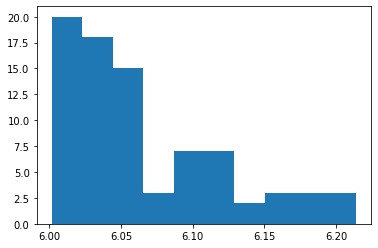

In [76]:
print('redshift distribution of FN:')
plt.hist(fn['z'])

In [77]:
# false positive: the difference between tp and pred positive
fp = pd.merge(tp, test_copy, on=['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [78]:
fp.describe()

,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label_x,z,label_y
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
print('w/o snr constraints, label prediction results:\n')
print('precision:', round(tp.shape[0]/(tp.shape[0]+fp.shape[0]), 4))
print('recall:', round(tp.shape[0]/(tp.shape[0]+fn.shape[0]), 4))

w/o snr constraints, label prediction results:

precision: 1.0
recall: 0.6384


bins: [6.00174803 6.03943737 6.07712671 6.11481605 6.15250539 6.19019472
 6.22788406 6.2655734  6.30326274 6.34095208 6.37864142 6.41633076
 6.4540201  6.49170943 6.52939877 6.56708811 6.60477745 6.64246679
 6.68015613 6.71784547 6.7555348 ]
test qso: #/bin: [35. 19. 26. 25. 26. 19. 14. 17. 13.  4.  8.  8.  2.  1.  2.  2.  2.  0.
  0.  1.]
test qso: #/bin: [ 0.  0. 16. 17. 20. 16. 14. 17. 13.  4.  8.  8.  2.  1.  2.  2.  2.  0.
  0.  1.]


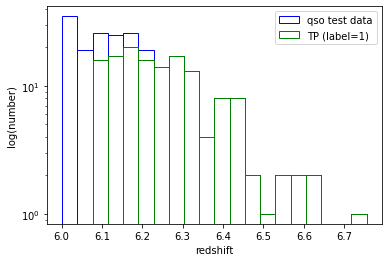

<ipython-input-85-902dca836d02>:12: RuntimeWarning: invalid value encountered in true_divide
  ratio = hist21/hist11


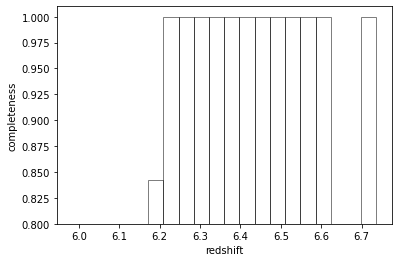

In [85]:
hist11, bins11, _ = plt.hist(qso_test_25['z'], bins=20, fill=False, label='qso test data', edgecolor='blue')
hist21, bins21, _ = plt.hist(tp['z'], bins11, fill=False, label='TP (label=1)', edgecolor='green')
print('bins:', bins11)
print('test qso: #/bin:', hist11)
print('test qso: #/bin:', hist21)
plt.xlabel('redshift')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()

ratio = hist21/hist11
plt.bar(bins11[:-1], ratio, width=(bins11[1] - bins11[0]), alpha=0.5, label='Density Ratios', fill=False)
plt.ylim(0.8, 1.01)
plt.xlabel('redshift')
plt.ylabel('completeness')
plt.show()

### 22 < i < 25, Weighted prob

In [86]:
test_copy = test.copy()
test_copy = test_copy[test_copy['i_LSST_mag'] > 22.0]
test_copy = test_copy[test_copy['i_LSST_mag'] < 25.0]
print(len(test_copy))
print(len(test_copy[test_copy['label'] == 1]))

48832
224


In [88]:
# x: Y - F; y: r - Y
prob_2a = filter2a.predict_proba(np.array([test_copy['Y_WFI_mag']-test_copy['F_WFI_mag'], test_copy['r_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

test_copy['prob_2a'] = prob_2a[:, 1]

In [89]:
# x: z - H; y: i - Y
prob_2b = filter2b.predict_proba(np.array([test_copy['z_LSST_mag']-test_copy['H_WFI_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

test_copy['prob_2b'] = prob_2b[:, 1]

In [90]:
# x: Y - H; y: i - Y
prob_2c = filter2c.predict_proba(np.array([test_copy['Y_WFI_mag']-test_copy['H_WFI_mag'], test_copy['i_LSST_mag']-test_copy['Y_WFI_mag']]).transpose())

test_copy['prob_2c'] = prob_2c[:, 1]

In [91]:
# use best scores as weights:
weights = [1., 1., 0.998]
probabilities = test_copy[['prob_2a', 'prob_2b', 'prob_2c']]
cols = ['prob_2a', 'prob_2b', 'prob_2c']

wprob = np.zeros(len(probabilities['prob_2a']))
for i in range(len(weights)):
    sum_weights = sum(weights)
    wprob += weights[i]*probabilities[cols[i]]/sum_weights

print(wprob.shape)

(48832,)


In [92]:
test_copy['weighted prob'] = wprob
test_copy.head()

,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_2a,prob_2b,prob_2c,weighted prob
56,28.281109,24.491804,21.976750,20.690551,20.627252,20.692341,20.587697,1.0,1.0,1.0,1.0,1.000000
68,28.273155,24.521013,21.774409,20.962529,20.911116,20.944148,20.796961,1.0,1.0,1.0,1.0,1.000000
80,27.226124,24.825485,21.940143,21.419429,21.385758,21.355966,21.103209,1.0,1.0,1.0,1.0,1.000000
137,26.283738,23.617095,20.988860,20.683242,20.747272,20.776251,20.615905,1.0,1.0,1.0,0.0,0.667111
145,25.920754,23.591678,20.736045,20.487876,20.522353,20.487307,20.272406,1.0,1.0,1.0,0.0,0.667111


### Weighted prob threshold = 0.67

In [97]:
pred_qso1 = test_copy[test_copy['weighted prob'] > 0.67]
pred_qso1.describe()

,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_2a,prob_2b,prob_2c,weighted prob
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.0,148.0,148.0,148.000000,148.000000
mean,27.831429,24.380135,21.681094,20.847935,20.793013,20.783607,20.601608,1.0,1.0,1.0,0.972973,0.991003
std,1.289719,0.567960,0.717983,0.631282,0.659910,0.678395,0.685658,0.0,0.0,0.0,0.126069,0.041967
min,25.089139,22.489987,19.508132,18.855353,18.835941,18.892170,18.608676,1.0,1.0,1.0,0.333333,0.778074
25%,27.223322,24.083081,21.395764,20.477458,20.400475,20.407942,20.236208,1.0,1.0,1.0,1.000000,1.000000
50%,27.678528,24.541735,21.782141,21.008961,20.933671,20.924173,20.727490,1.0,1.0,1.0,1.000000,1.000000
75%,28.275144,24.799745,21.996805,21.344401,21.270244,21.271788,21.094958,1.0,1.0,1.0,1.000000,1.000000
max,33.410321,24.987774,25.104718,21.787625,21.854093,21.938072,21.815866,1.0,1.0,1.0,1.000000,1.000000


In [98]:
tp1 = pred_qso1.merge(qso_test_25)
tp1.describe()

,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_2a,prob_2b,prob_2c,weighted prob,z
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.0,148.0,148.0,148.000000,148.000000,148.000000
mean,27.831429,24.380135,21.681094,20.847935,20.793013,20.783607,20.601608,1.0,1.0,1.0,0.972973,0.991003,6.252857
std,1.289719,0.567960,0.717983,0.631282,0.659910,0.678395,0.685658,0.0,0.0,0.0,0.126069,0.041967,0.131039
min,25.089139,22.489987,19.508132,18.855353,18.835941,18.892170,18.608676,1.0,1.0,1.0,0.333333,0.778074,6.051593
25%,27.223322,24.083081,21.395764,20.477458,20.400475,20.407942,20.236208,1.0,1.0,1.0,1.000000,1.000000,6.152677
50%,27.678528,24.541735,21.782141,21.008961,20.933671,20.924173,20.727490,1.0,1.0,1.0,1.000000,1.000000,6.228206
75%,28.275144,24.799745,21.996805,21.344401,21.270244,21.271788,21.094958,1.0,1.0,1.0,1.000000,1.000000,6.312473
max,33.410321,24.987774,25.104718,21.787625,21.854093,21.938072,21.815866,1.0,1.0,1.0,1.000000,1.000000,6.755535


redshift distribution of TP:


(array([20., 37., 29., 31.,  9., 14.,  2.,  3.,  2.,  1.]),
 array([6.05159279, 6.12198699, 6.19238119, 6.26277539, 6.3331696 ,
        6.4035638 , 6.473958  , 6.5443522 , 6.6147464 , 6.6851406 ,
        6.7555348 ]),
 <BarContainer object of 10 artists>)

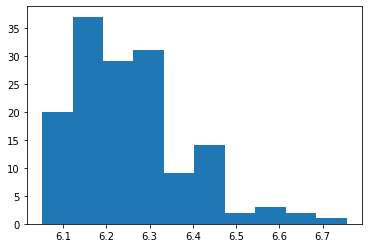

In [99]:
print('redshift distribution of TP:')
plt.hist(tp1['z'])

In [103]:
# false positive: the difference between tp and pred positive
fp1 = pd.merge(tp1, pred_qso1, on=['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [104]:
fp1 = fp1.drop(columns=['label_x', 'prob_2a_x', 'prob_2b_x', 'prob_2c_x', 'weighted prob_x', 'z'])
fp1.rename(columns={'label_y': 'label', 'prob_2a_y': 'prob_2a', 'prob_2b_y': 'prob_2b', 'prob_2c_y': 'prob_2c'}, inplace=True)
fp1.describe()

,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_2a,prob_2b,prob_2c,weighted prob_y
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# false negative: the difference between all positive and true positive
fn1 = pd.merge(tp1, qso_test_25, on=['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
fn1 = fn1.drop(columns=['z_x', 'prob_2a', 'prob_2b', 'prob_2c'])
fn1 = fn1.rename(columns={'z_y':'z'})
fn1.describe()

,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,weighted prob,z
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,0.0,0.0,76.000000
mean,26.709329,24.195678,21.496698,21.172056,21.201834,21.194653,20.991142,NaN,NaN,6.062624
std,0.855396,0.730803,0.723008,0.725620,0.750730,0.765518,0.765914,NaN,NaN,0.051041
min,24.434817,22.315978,19.649024,19.322046,19.265916,19.191516,18.990067,NaN,NaN,6.001748
25%,26.309342,23.807563,21.189427,20.825330,20.802934,20.812926,20.620830,NaN,NaN,6.022430
50%,26.864979,24.440429,21.706284,21.409626,21.432382,21.355228,21.142216,NaN,NaN,6.046228
75%,27.237181,24.751440,22.010624,21.698133,21.729533,21.754383,21.550125,NaN,NaN,6.094606
max,28.277628,24.977877,22.468511,22.208307,22.364212,22.413041,22.243509,NaN,NaN,6.214130


redshift distribution of FN:


(array([20., 18., 14.,  3.,  6.,  6.,  2.,  3.,  3.,  1.]),
 array([6.00174803, 6.02298627, 6.04422451, 6.06546275, 6.08670099,
        6.10793922, 6.12917746, 6.1504157 , 6.17165394, 6.19289218,
        6.21413042]),
 <BarContainer object of 10 artists>)

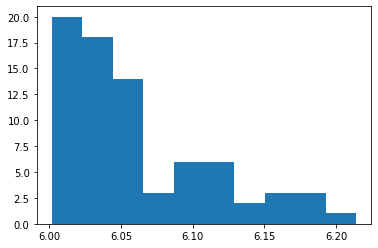

In [108]:
print('redshift distribution of FN:')
plt.hist(fn1['z'])

In [114]:
print('w/o snr constraints, probability prediction results:\n')
print('precision:', round(tp1.shape[0]/(tp1.shape[0]+fp1.shape[0]), 4))
print('recall:', round(tp1.shape[0]/(tp1.shape[0]+fn1.shape[0]), 4))

w/o snr constraints, probability prediction results:

precision: 1.0
recall: 0.6607


bins: [6.00174803 6.03943737 6.07712671 6.11481605 6.15250539 6.19019472
 6.22788406 6.2655734  6.30326274 6.34095208 6.37864142 6.41633076
 6.4540201  6.49170943 6.52939877 6.56708811 6.60477745 6.64246679
 6.68015613 6.71784547 6.7555348 ]
test qso: #/bin: [35. 19. 26. 25. 26. 19. 14. 17. 13.  4.  8.  8.  2.  1.  2.  2.  2.  0.
  0.  1.]
test qso: #/bin: [ 0.  1. 17. 18. 20. 18. 14. 17. 13.  4.  8.  8.  2.  1.  2.  2.  2.  0.
  0.  1.]


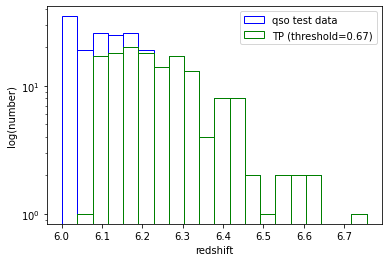

<ipython-input-121-013a7521f3ae>:12: RuntimeWarning: invalid value encountered in true_divide
  ratio = hist21/hist11


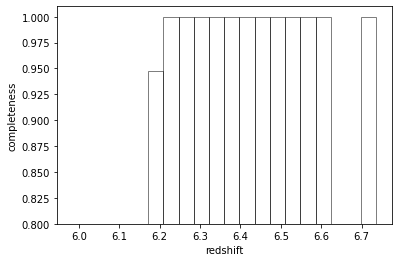

In [121]:
hist11, bins11, _ = plt.hist(qso_test_25['z'], bins=20, fill=False, label='qso test data', edgecolor='blue')
hist21, bins21, _ = plt.hist(tp1['z'], bins11, fill=False, label='TP (threshold=0.67)', edgecolor='green')
print('bins:', bins11)
print('test qso: #/bin:', hist11)
print('test qso: #/bin:', hist21)
plt.xlabel('redshift')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()

ratio = hist21/hist11
plt.bar(bins11[:-1], ratio, width=(bins11[1] - bins11[0]), alpha=0.5, label='Density Ratios', fill=False)
plt.ylim(0.8, 1.01)
plt.xlabel('redshift')
plt.ylabel('completeness')
plt.show()

### Apply the filters to whole test catalog

In [115]:
test0c = test0.copy()
print(len(test0c))
print(len(test0c[test0c['label'] == 1]))

66285
5540


In [116]:
# x: Y - F; y: r - Y
prob_a = filter2a.predict_proba(np.array([test0c['Y_WFI_mag']-test0c['F_WFI_mag'], test0c['r_LSST_mag']-test0c['Y_WFI_mag']]).transpose())

test0c['prob_a'] = prob_a[:, 1]

In [117]:
# x: z - H; y: i - Y
prob_b = filter2b.predict_proba(np.array([test0c['z_LSST_mag']-test0c['H_WFI_mag'], test0c['i_LSST_mag']-test0c['Y_WFI_mag']]).transpose())

test0c['prob_b'] = prob_b[:, 1]

In [118]:
# x: Y - H; y: i - Y
prob_c = filter2c.predict_proba(np.array([test0c['Y_WFI_mag']-test0c['H_WFI_mag'], test0c['i_LSST_mag']-test0c['Y_WFI_mag']]).transpose())

test0c['prob_c'] = prob_c[:, 1]

In [119]:
# use best scores as weights:
weights = [1., 1., 0.998]
probabilities = test0c[['prob_a', 'prob_b', 'prob_c']]
cols = ['prob_a', 'prob_b', 'prob_c']

wprob = np.zeros(len(probabilities['prob_a']))
for i in range(len(weights)):
    sum_weights = sum(weights)
    wprob += weights[i]*probabilities[cols[i]]/sum_weights

print(wprob.shape)

(66285,)


In [120]:
test0c['weighted prob'] = wprob
test0c.head()

,z,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_a,prob_b,prob_c,weighted prob
0,6.669676,29.356969,30.246452,32.650390,24.245616,24.307675,24.446622,24.450786,1.0,1.0,1.0,1.0,1.000000
1,6.083415,29.979914,34.465248,26.538113,26.958371,26.651371,27.003728,26.927044,1.0,0.0,1.0,1.0,0.666444
2,6.406638,30.088164,27.532037,25.116377,24.159598,24.087764,24.303871,24.112669,1.0,1.0,1.0,1.0,1.000000
3,6.014952,29.193368,29.244599,26.729309,26.512185,26.188512,26.356917,26.036399,1.0,0.0,1.0,0.0,0.333556
4,6.046875,31.598820,27.858721,27.001626,30.095772,29.194047,29.298482,28.025738,1.0,0.0,0.0,0.0,0.000000


In [122]:
pred_qso = test0c[test0c['weighted prob'] > 0.67]
pred_qso.describe()

,z,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_a,prob_b,prob_c,weighted prob
count,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.0,2612.000000,2612.0,2612.000000,2612.000000
mean,6.336523,29.749217,27.645231,24.906254,23.665719,23.622772,23.664557,23.487917,1.0,0.996810,1.0,0.976901,0.991247
std,0.274378,1.340022,1.764034,1.913274,1.441629,1.468253,1.488652,1.505507,0.0,0.040614,0.0,0.111177,0.039203
min,6.000215,23.737275,21.400500,18.803401,18.181244,18.048911,17.986569,17.740505,1.0,0.333333,1.0,0.333333,0.777630
25%,6.138327,28.929902,26.415229,23.562468,22.667888,22.616338,22.652786,22.467739,1.0,1.000000,1.0,1.000000,1.000000
50%,6.266111,29.616310,27.584807,24.738695,23.671650,23.644995,23.682924,23.483214,1.0,1.000000,1.0,1.000000,1.000000
75%,6.471231,30.421638,28.763540,26.076030,24.679762,24.643077,24.697710,24.536282,1.0,1.000000,1.0,1.000000,1.000000
max,8.409925,35.707711,35.342790,33.066414,28.308225,29.281671,29.175675,30.341539,1.0,1.000000,1.0,1.000000,1.000000


In [123]:
tp = pred_qso.merge(qso_test)
tp.describe()

,z,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,prob_a,prob_b,prob_c,weighted prob
count,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.0,2612.000000,2612.0,2612.000000,2612.000000
mean,6.336523,29.749217,27.645231,24.906254,23.665719,23.622772,23.664557,23.487917,1.0,0.996810,1.0,0.976901,0.991247
std,0.274378,1.340022,1.764034,1.913274,1.441629,1.468253,1.488652,1.505507,0.0,0.040614,0.0,0.111177,0.039203
min,6.000215,23.737275,21.400500,18.803401,18.181244,18.048911,17.986569,17.740505,1.0,0.333333,1.0,0.333333,0.777630
25%,6.138327,28.929902,26.415229,23.562468,22.667888,22.616338,22.652786,22.467739,1.0,1.000000,1.0,1.000000,1.000000
50%,6.266111,29.616310,27.584807,24.738695,23.671650,23.644995,23.682924,23.483214,1.0,1.000000,1.0,1.000000,1.000000
75%,6.471231,30.421638,28.763540,26.076030,24.679762,24.643077,24.697710,24.536282,1.0,1.000000,1.0,1.000000,1.000000
max,8.409925,35.707711,35.342790,33.066414,28.308225,29.281671,29.175675,30.341539,1.0,1.000000,1.0,1.000000,1.000000


redshift distribution of TP:


(array([1.19e+03, 7.91e+02, 3.91e+02, 1.63e+02, 4.70e+01, 1.80e+01,
        5.00e+00, 4.00e+00, 1.00e+00, 2.00e+00]),
 array([6.00021479, 6.2411858 , 6.48215681, 6.72312781, 6.96409882,
        7.20506983, 7.44604083, 7.68701184, 7.92798285, 8.16895385,
        8.40992486]),
 <BarContainer object of 10 artists>)

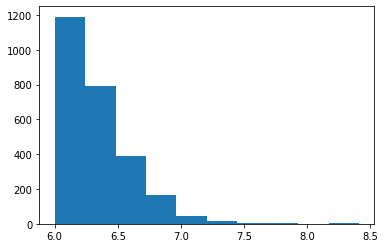

In [124]:
print('redshift distribution of TP:')
plt.hist(tp['z'])

In [125]:
# false positive: the difference between tp and pred positive
fp = pd.merge(tp, pred_qso, on=['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)

In [127]:
fp = fp.drop(columns=['label_x', 'prob_a_x', 'prob_b_x', 'prob_c_x', 'weighted prob_x'])
fp.rename(columns={'label_y': 'label', 'prob_a_y': 'prob_a', 'prob_b_y': 'prob_b', 'prob_c_y': 'prob_c'}, inplace=True)
fp.describe()

,z_x,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,z_y,label,prob_a,prob_b,prob_c,weighted prob_y
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
# false negative: the difference between all positive and true positive
fn = pd.merge(tp, qso_test, on=['r_LSST_mag', 'i_LSST_mag', 'z_LSST_mag', 'Y_WFI_mag', 'J_WFI_mag', 'H_WFI_mag', 'F_WFI_mag'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
fn = fn.drop(columns=['z_x', 'prob_a', 'prob_b', 'prob_c'])
fn = fn.rename(columns={'z_y':'z'})
fn.describe()

,r_LSST_mag,i_LSST_mag,z_LSST_mag,Y_WFI_mag,J_WFI_mag,H_WFI_mag,F_WFI_mag,label,weighted prob,z
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,0.0,0.0,2928.000000
mean,29.823835,28.583893,26.874539,26.405370,26.399825,26.417064,26.176696,NaN,NaN,6.276408
std,1.310889,1.567621,2.024764,1.958593,1.950252,1.962572,1.935433,NaN,NaN,0.299543
min,24.434817,22.315978,19.649024,19.322046,19.265916,19.191516,18.990067,NaN,NaN,6.000077
25%,29.062268,27.891323,25.887157,25.396657,25.373371,25.377355,25.191790,NaN,NaN,6.067488
50%,29.654982,28.630847,27.187211,26.625330,26.610818,26.627659,26.436616,NaN,NaN,6.177413
75%,30.443127,29.386152,28.046271,27.678668,27.624244,27.662156,27.397004,NaN,NaN,6.379064
max,38.149953,35.495708,36.798806,35.672331,33.879891,34.514265,34.228085,NaN,NaN,8.482816


redshift distribution of FN:


(array([1792.,  666.,  226.,  135.,   61.,   30.,    8.,    6.,    2.,
           2.]),
 array([6.00007716, 6.24835101, 6.49662487, 6.74489873, 6.99317259,
        7.24144645, 7.48972031, 7.73799417, 7.98626803, 8.23454189,
        8.48281575]),
 <BarContainer object of 10 artists>)

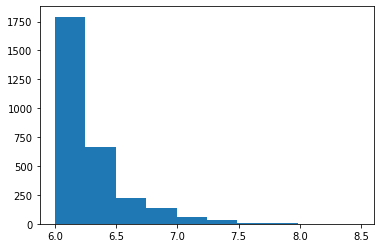

In [129]:
print('redshift distribution of FN:')
plt.hist(fn['z'])

In [130]:
print('w/o snr constraints, probability prediction results:\n')
print('precision:', round(tp.shape[0]/(tp.shape[0]+fp.shape[0]), 4))
print('recall:', round(tp.shape[0]/(tp.shape[0]+fn.shape[0]), 4))

w/o snr constraints, probability prediction results:

precision: 1.0
recall: 0.4715


bins: [6.00007716 6.12421409 6.24835101 6.37248794 6.49662487 6.6207618
 6.74489873 6.86903566 6.99317259 7.11730952 7.24144645 7.36558338
 7.48972031 7.61385724 7.73799417 7.8621311  7.98626803 8.11040496
 8.23454189 8.35867882 8.48281575]
test qso: #/bin: [1.736e+03 1.279e+03 8.650e+02 5.930e+02 3.830e+02 2.260e+02 1.820e+02
 9.600e+01 6.700e+01 3.700e+01 2.700e+01 2.100e+01 8.000e+00 5.000e+00
 5.000e+00 3.000e+00 1.000e+00 2.000e+00 2.000e+00 2.000e+00]
test qso: #/bin: [573. 650. 477. 315. 247. 136.  93.  50.  27.  16.   9.   9.   2.   3.
   2.   0.   1.   0.   1.   1.]


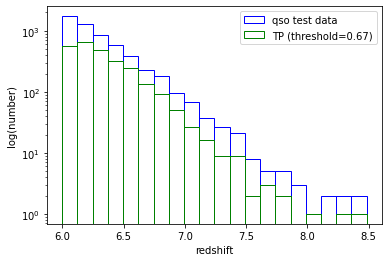

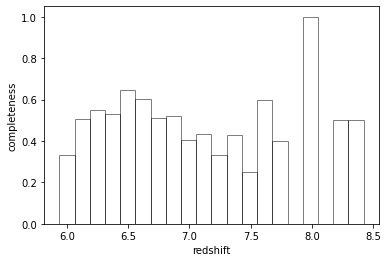

In [132]:
hist11, bins11, _ = plt.hist(qso_test['z'], bins=20, fill=False, label='qso test data', edgecolor='blue')
hist21, bins21, _ = plt.hist(tp['z'], bins11, fill=False, label='TP (threshold=0.67)', edgecolor='green')
print('bins:', bins11)
print('test qso: #/bin:', hist11)
print('test qso: #/bin:', hist21)
plt.xlabel('redshift')
plt.ylabel('log(number)')
plt.yscale('log')
plt.legend()
plt.show()

ratio = hist21/hist11
plt.bar(bins11[:-1], ratio, width=(bins11[1] - bins11[0]), alpha=0.5, label='Density Ratios', fill=False)
plt.xlabel('redshift')
plt.ylabel('completeness')
plt.show()